In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
stk_data = pd.read_csv("Tatacoffee13_21.csv")

# Select relevant columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

# Scale the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Open", "High", "Low", "Close"])

print("Len:", data1.shape)

# Split the dataset into training and testing sets
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]

y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)


Len: (2225, 4)
X_train length: (1780, 4)
X_test length: (445, 4)
y_train length: (1780, 4)
y_test length: (445, 4)


In [3]:
# Forecast the next five days
n_forecast = 5
forecasts = {}

for col in data1.columns:
    hwes_model = ExponentialSmoothing(X_train[col], trend='add', seasonal=None, seasonal_periods=None).fit()
    forecast = hwes_model.forecast(steps=n_forecast)
    forecasts[col] = forecast

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame(forecasts)

# Inverse transform the forecast to the original scale
forecast_original_scale = Ms.inverse_transform(forecast_df)
forecast_original_scale = pd.DataFrame(forecast_original_scale, columns=["Open", "High", "Low", "Close"])

print("Next five days forecast:")
print(forecast_original_scale)


Next five days forecast:
        Open       High        Low      Close
0  57.962826  67.986035  52.688409  66.042090
1  57.201588  67.222069  51.926817  65.284181
2  56.440350  66.458104  51.165226  64.526271
3  55.679112  65.694139  50.403635  63.768362
4  54.917874  64.930173  49.642043  63.010452


In [4]:
# Make predictions for the test set
predictions = {}

for col in data1.columns:
    hwes_model = ExponentialSmoothing(X_train[col], trend='add', seasonal=None, seasonal_periods=None).fit()
    pred = hwes_model.forecast(steps=len(X_test))
    predictions[col] = pred

# Create a DataFrame for the predictions
pred_df = pd.DataFrame(predictions)

# Evaluate the model
for col in data1.columns:
    mse = mean_squared_error(X_test[col], pred_df[col])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((X_test[col] - pred_df[col]) / X_test[col])) * 100
    print(f'{col}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  Root Mean Squared Error (RMSE): {rmse}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape}%')


Open:
  Mean Squared Error (MSE): 0.032449187935688455
  Root Mean Squared Error (RMSE): 0.1801365813367414
  Mean Absolute Percentage Error (MAPE): inf%
High:
  Mean Squared Error (MSE): 0.030271432967635736
  Root Mean Squared Error (RMSE): 0.17398687584882871
  Mean Absolute Percentage Error (MAPE): inf%
Low:
  Mean Squared Error (MSE): 0.03336706261638643
  Root Mean Squared Error (RMSE): 0.18266653392558374
  Mean Absolute Percentage Error (MAPE): inf%
Close:
  Mean Squared Error (MSE): 0.03074971735270864
  Root Mean Squared Error (RMSE): 0.17535597324502133
  Mean Absolute Percentage Error (MAPE): inf%


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\pandas\core\indexes\range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


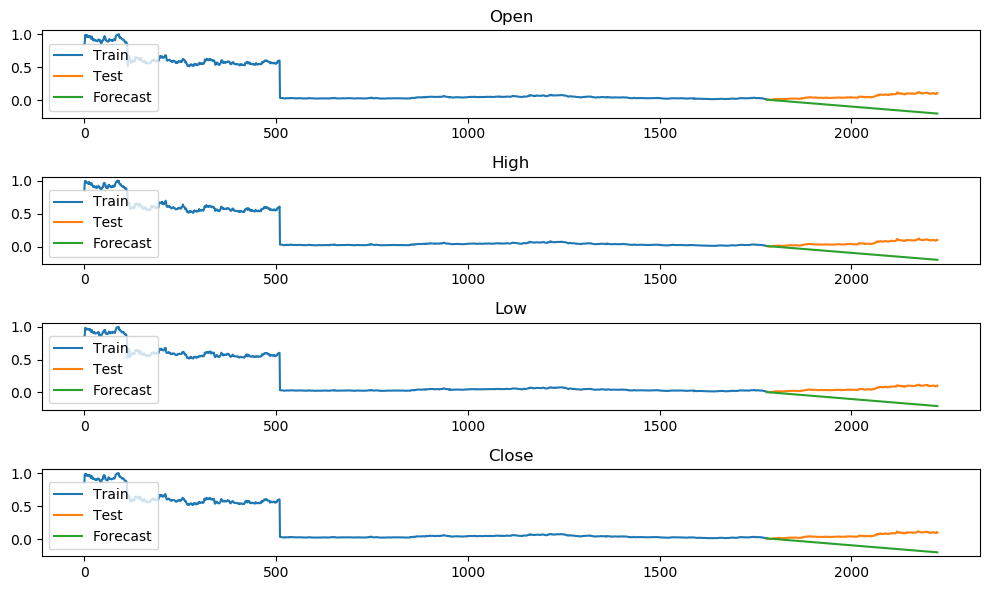

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))

for i, col in enumerate(data1.columns):
    plt.subplot(len(data1.columns), 1, i+1)
    plt.plot(X_train.index, X_train[col], label='Train')
    plt.plot(X_test.index, X_test[col], label='Test')
    plt.plot(pred_df.index, pred_df[col], label='Forecast')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()
